# Homework 1

This homework evaluates if you are familar with NumPy to create machine learning related functions. Thus, all your functions here should be only made using NumPy, without using any other libraries like pandas, scikit-learn, or scipy. You will run a complete machine learning process from preprocessing to model performance testing by using the functions you will develop.

### This assignment is made to practice the features of NumPy. Therefore, the use of for loops is strictly prohibited. All problems can be solved without explicit loops. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In this homework, you will continue to use the same dataset you have used in the first lab, as well as the code you have made. However, this time, you will create a model and even test it - by dividing the dataset into training and test sets. You will practice applying each function one after the other in a correct order. 

To practice NumPy efficiently, unlike the lab, you will only use the values of the dataset, ignoring Pandas properties such as column names.

- Run the block below to load the dataset (**X** and **y**).

In [2]:
from sklearn.datasets import fetch_california_housing

california_housing = fetch_california_housing(as_frame=False)

X = california_housing.data
y = california_housing.target

Now, you are ready to use both features and labels. To handle it correctly, you need to be familiar with its axis concept as it no longer has indices and columns that you can check by printing the variable.

In [3]:
X

array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
          37.88      , -122.23      ],
       [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
          37.86      , -122.22      ],
       [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
          37.85      , -122.24      ],
       ...,
       [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
          39.43      , -121.22      ],
       [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
          39.43      , -121.32      ],
       [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
          39.37      , -121.24      ]])

In [4]:
y

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

### 1. Preprocessing

The first task is to open the dataset and preprocess it into the form that the model can understand. It involves imputation, train_test_split, standardization, and normalization. Some functions are already covered by the first lab, so if you finished the lab before, you can freely bring your code here to finish your homework.



First, you need to develop both standardization and normalization functions. You can re-use your lab functions here if you have finished your lab tasks. Please carefully refer to the definitions of those two functions as follows:


- Standardization: Make features have the same standard deviaton and mean.

- Normalization: Make the range of value normalized into [0, 1]. This means that each column's minimum value should be zero and maximum value should be one.

In [5]:
def standardize(data):
  """
  Input: NumPy ndarray
  Output: NumPy ndarray with column mean == 0 and std == 1
  """
  mean = np.mean(data, axis=0)
  std = np.std(data, axis=0)

  return (data - mean) / std

def normalize(data):
  """"
  Input: NumPy ndarray
  Output: NumPy ndarray with column min == 0 and max == 1
  """
  min = np.min(data, axis=0)
  max = np.max(data, axis=0)
  return (data - min)/(max - min)

Let's apply both functions separately and create X_standardized and X_normalized.

In [6]:
X_standardized = standardize(X)
X_normalized = normalize(X)

You may also need to check if those functions are correctly made. Create a function to check the dataset's min, max, mean, std of each feature. You can re-use your lab function (**describe**) but this time you are not allowed to use Pandas DataFrame. There is no expected format for this function if you are successfully able to plot four statistics (min, max, mean, std). 

In [7]:
def describe(data):
  """
  Describe four statistics of the dataset.
  
  Input: NumPy ndarray
  Output: vertical min, max, mean, standard deviation
  """
  # data type 

  return np.array([np.min(data, axis=0),np.max(data, axis=0),np.mean(data, axis=0),np.std(data, axis=0)])

Using this function, let's check if your **standardize** and **normalize** functions are correctly working. 
- **Your output should be the same as the one below.**

In [8]:
describe(X_standardized)

array([[-1.77429947e+00, -2.19618048e+00, -1.85231860e+00,
        -1.61076772e+00, -1.25612255e+00, -2.28999974e-01,
        -1.44756800e+00, -2.38599234e+00],
       [ 5.85828581e+00,  1.85618152e+00,  5.51632363e+01,
         6.95717133e+01,  3.02503302e+01,  1.19419103e+02,
         2.95806762e+00,  2.62528006e+00],
       [ 6.60969987e-17,  5.50808322e-18,  6.60969987e-17,
        -1.06030602e-16, -1.10161664e-17,  3.44255201e-18,
        -1.07958431e-15, -8.52651283e-15],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [9]:
describe(X_normalized)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.23246376, 0.54195071, 0.03248795, 0.02262871, 0.03986874,
        0.00191395, 0.32857188, 0.47612505],
       [0.13101721, 0.24676966, 0.01753907, 0.0140484 , 0.03173953,
        0.00835784, 0.226982  , 0.19955012]])

However, this is not a complete setting, as you need to both train the model and test it. That means you need to divide the dataset into two parts: {a training set, a test set} and only use the training set to train the model. This means that you also need to create the function for it.

In [10]:
y.size

20640

In [11]:
def train_test_split(X, y, test_ratio = 0.3):
  # simulation
  # cross-val
  
  """
  Input:
    - X: a set of features
    - y: corresponding labels
    - test_ratio: ratio of the test set
    
  Output:
    - X_train: separated training instances
    - X_test: separated test instances
    - y_train: separated training labels
    - y_test: separated test labels
  
  1. Randomly shuffle the indices of the data instances
  2. Divide the indices into two parts with the ratio of [1-test ratio:test ratio]
  3. Select training instances and labels with the first set of indices and test instances and labels with the second set of indices
  4. Return the training set and the test set
  """
  len = y.size

  indices = np.arange(len)
  rng = np.random.default_rng()
  np.random.shuffle(indices)
  
  [train_indices, test_indices] = np.split(indices, np.rint([len*(1-test_ratio)]).astype(int))
  
  X_train, X_test = X[train_indices], X[test_indices]
  y_train, y_test = y[train_indices], y[test_indices]


  return X_train, X_test, y_train, y_test

Split your dataset into training and test sets with `test ratio = 0.3`.

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 0.3)

After applying your train_test_split function, you can check the shape of each subset. The training set should have 14,448 rows while the test set might have 6,192 records. Uncommend the below line and check the shapes.

In [13]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14448, 8), (6192, 8), (14448,), (6192,))

You may remember, when you apply standardization or normalization on both training and test sets, you should not use any statistics from the test set. This means that you should use mean and standard deviation (or max and min values) of the training set and use those statistics to avoid cheating and make a valid model. 

- Create two functions (**apply_standardization**, **apply_normalization**) that uses training set's statistics and apply standardization or normalization to both sets.

In [14]:
def apply_standardization(X_train, X_test):
  """
  Input:
    - X_train: training instances
    - X_test: test instances

  Output:
    - X_train_standardized
    - X_test_standardized

  Use training set's mean and standard deviation to standardize both training and test sets
  """
  std = np.std(X_train, axis=0)
  mean = np.mean(X_train, axis=0)

  return (X_train-mean) / std, (X_test-mean) / std

In [15]:
def apply_normalization(X_train, X_test):
  """
  Input:
    - X_train
    - X_test

  Output:
    - X_train_standardized
    - X_test_standardized
  """
  min = np.min(X_train, axis=0)
  max = np.max(X_train, axis=0)

  return (X_train - min) / (max - min), (X_test - min) / (max - min)

- Apply two functions (**apply_standardization**, **apply_normalization**) to created standardized and normalized datasets.

In [16]:
X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
X_train_normalized, X_test_normalized = apply_normalization(X_train, X_test)

Check the statistics using describe method. Test set should **NOT** have zero mean and standard deviation 1 or zero min and one max. Good test set however might show close value to zero or one.

In [17]:
describe(X_train_standardized)

array([[-1.76545746e+00, -2.19190102e+00, -1.91405500e+00,
        -1.49554659e+00, -1.23622996e+00, -1.83504978e+00,
        -1.45240063e+00, -2.36412901e+00],
       [ 5.82518948e+00,  1.84754025e+00,  5.29913475e+01,
         6.82035020e+01,  2.97654538e+01,  6.53345137e+01,
         2.95565405e+00,  2.63353479e+00],
       [-8.06951290e-15,  9.52926061e-17, -1.52099786e-14,
        -4.69043870e-16,  3.02299099e-17, -4.88930755e-15,
        -6.37874151e-14, -2.56864804e-13],
       [ 1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00,
         1.00000000e+00,  1.00000000e+00]])

In [18]:
describe(X_test_standardized)

array([[-1.76545746e+00, -2.19190102e+00, -1.89623713e+00,
        -1.58174378e+00, -1.23796787e+00, -1.78806617e+00,
        -1.44303176e+00, -2.38914235e+00],
       [ 5.82518948e+00,  1.84754025e+00,  5.69004580e+01,
         5.07634595e+01,  1.18258916e+01,  1.01015022e+03,
         2.95565405e+00,  2.50346546e+00],
       [-3.02378073e-03, -9.07645575e-03, -1.09731266e-02,
        -8.64563915e-03, -6.33512296e-03,  3.39450297e-01,
        -1.34593248e-02,  7.60025810e-03],
       [ 9.81561652e-01,  9.89302742e-01,  1.10162662e+00,
         9.32937582e-01,  9.45717618e-01,  1.53637880e+01,
         1.00176582e+00,  1.00754600e+00]])

In [19]:
describe(X_train_normalized)

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        ],
       [0.23258327, 0.5426248 , 0.03486096, 0.0214572 , 0.03987622,
        0.02731966, 0.32948789, 0.47304683],
       [0.13174108, 0.24755899, 0.01821314, 0.0143474 , 0.03225631,
        0.0148877 , 0.22685744, 0.20009349]])

In [20]:
describe(X_test_normalized)

array([[ 0.00000000e+00,  0.00000000e+00,  3.24519387e-04,
        -1.23670542e-03, -5.60585251e-05,  6.99477723e-04,
         2.12539851e-03, -5.00500501e-03],
       [ 1.00000000e+00,  1.00000000e+00,  1.07119719e+00,
         7.49780766e-01,  4.21335875e-01,  1.50661284e+01,
         1.00000000e+00,  9.73973974e-01],
       [ 2.32184910e-01,  5.40377844e-01,  3.46611042e-02,
         2.13331599e-02,  3.96718722e-02,  3.23732947e-02,
         3.26434541e-01,  4.74567591e-01],
       [ 1.29311989e-01,  2.44910787e-01,  2.00640843e-02,
         1.33852269e-02,  3.05053630e-02,  2.28731395e-01,
         2.27258029e-01,  2.01603397e-01]])

### 2. Linear regression

Now you are ready to put your dataset to train a model. You will continue to use the linear regression that you have made in the lab using the normal equation. 

- Create the **solver** function that creates a linear regression line and return the coefficents. You can re-use the function from the first lab.
- Here you should use **all available features** of the dataset.
- You should add one column representing a bias to your feature matrix.

The normal equation can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

In [21]:
def solver(X, y):
  """
  Get the weights and bias of linear regression classifier on the input dataset (X, y).

  Input: 
   - X: a set of features
   - y: labels
  Output:
   - theta: weights and bias of the linear regression
  """
  A = np.insert(X, X.shape[1], 1, axis=1)

  theta = (np.linalg.inv((A.T @ A)) @ (A.T @ y))
  return theta

You should run this solver function only on the standardized training set (**X_train_standardized**, **y_train**) to create the model and evalute it later on the test set.

- Run the **solve** function on **X_train_standardized** and **y_train** and save the result to **theta**.

In [22]:
theta = solver(X_train_standardized, y_train)
print(theta)

[ 0.82504979  0.11995615 -0.24721381  0.27171934  0.0134963  -0.16608931
 -0.88249344 -0.84168038  2.06615072]


You now have a complete model trained on the training set. Then the next interesting thing is to evaluate if the model is good enough by using the test set. To do this, you need to create a predict function that can return the expected value. 

- Create the **predict** function which put each instance into the regression equation to predict the value. **DO NOT USE ANY LOOP**.

In [23]:
def predict(X, theta):
  """
  Input: 
   - X: data instances to predict
   - theta: trained regression coefficients

  Output:
   - y_hat: predicted values (X @ weight) + bias
  """
  return (X @ theta[:-1]) + theta[-1]

This predict function should be able to return the predicted value of the housing price. Then now you might want to return the mean squared error (and its variants) of the whole model. There can be many different metrics but here you will measure the rooted mean squared error (RMSE). RMSE can be calculated as follows: 

$RMSE = \sqrt{\frac{1}{n}\sum_{t=1}^{n}(\hat{y}_t - y_t)^2} $.

Note that $\hat{y}$ is a predicted label and $y$ is a true label.

- Create a function **rooted_mean_squared_error** that calculates the RMSE value.

In [24]:
def rooted_mean_squared_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true class labels of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - RMSE: the RMSE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X, theta)
  
  return np.sqrt((1/y.size) * np.sum(np.square(y_hat - y)))

- Run RMSE function to test our model created by our solver function. Use predict function to calculate our predicted values. Report the RMSE value. Since you used the standardized dataset for training, you should do the same for testing.

Even though the RMSE is generally the preferred performance measure for
regression tasks, in some contexts you may prefer to use another function. For
example, suppose that there are many outliers. In that case, you may
consider using the mean absolute error (MAE). It's direct translation of l1 and l2 norm. The higher the norm index, the more it focuses on large values and
neglects small ones. This is why the RMSE is more sensitive to
outliers than the MAE. But when outliers are exponentially rare (like
in a bell-shaped curve), the RMSE performs very well and is
generally preferred.

MAE can be calculated as follows:

$MAE = \frac{1}{n}\sum_{t=1}^{n}|\hat{y}_t - y_t|$

- Implement a function for MAE **mean_absolute_error**, which receives the same parameters *X*, *y*, and *theta*.

In [25]:
def mean_absolute_error(X, y, theta):
  """
  Input:
    - X_test: data instances to test
    - y_test: true values of the corresponding data instances (X_test)
    - theta: trained regression coefficients

  Output:
    - MAE: MAE score

  Use predict function to calculate our predicted values.
  """
  y_hat = predict(X, theta)

  return (1/y.size)*(np.sum(np.abs(y_hat - y)))

Train your regression model on the **standardized** training set and evaluate your method with two different scores: RMSE and MAE. Print two scores here.

In [26]:
rmse_score = rooted_mean_squared_error(X_test_standardized, y_test, theta)
mae_score = mean_absolute_error(X_test_standardized, y_test, theta)

In [27]:
rmse_score, mae_score

(2.6077857356332066, 0.5645374617306208)

### 4. Linear regression with regularization

You have learned the Ridge regression in the lecture. Fortunately, the Ridge regression also can be represented as a closed form solution with the normal equation. 

Your task here is to create a variant of your previous solver function supporting the Ridge regression. 

A closed form solution to Ridge can be represented as follows:

$\theta = (\textbf{X}^T \cdot \textbf{X} + \lambda \textbf{I})^{-1} \cdot \textbf{X}^T \cdot \textbf{y}$

where $\textbf{I}$ is an $(n+1) \times (n+1) $ identity matrix, since the feature matrix also includes the bias column.


In [28]:
def solver_with_ridge(X, y, alpha):
  """
  Get the weights and bias of the linear regression line on the dataset X, using the labels y.

  Input: 
   - X: a set of features to get weights
   - y: class labels
  Output:
   - theta: weights and bias of the ridge regression
  """
  A = np.insert(X, X.shape[1], 1, axis=1)
  I = np.identity(A.shape[1])

  theta = (np.linalg.inv((A.T @ A + (I*alpha))) @ (A.T @ y))

  return theta

Here, compare the performances changing the $\lambda$ value. Use the $\lambda$ value from 0 to 30 in increments of 0.1. Use RMSE as a score metric. Save those 300 scores into the list `scores`. 

- To iterate different $\lambda$ 's, you can use a loop for your convenience.

In [29]:
scores = np.array([])
alphas = np.arange(0, 100, 0.1)

for alpha in alphas:
	theta = solver_with_ridge(X_train_standardized, y_train, alpha)
	scores = np.append(scores, rooted_mean_squared_error(X_test_standardized, y_test, theta))

Plot the graph of different scores here. If you saved all scores in the list `scores`, you can simply run the block below. The resulting plot behaves in a different way based on your split training and test sets. Sometimes, the error just decreases or increases, but you can also see that the error decreases first, but after some point, it starts to increase. If you are interested, repeat many times to check different plots and you can even change the range from [0, 30] to something else. Uncomment the block below!

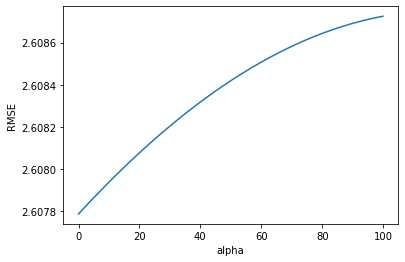

In [30]:
plt.plot(np.arange(0, 100, 0.1), scores)
plt.xlabel("alpha")
plt.ylabel("RMSE")
plt.show()

### 5. Model validation

So far, you simply had one test set and one training set. Now the question is if those sets were enough to represent the dataset's distribution. To overcome this problem, various validation methods have been developed and used such as cross-validation or a repeated holdout test. Here, you will develop one function that performs the repeated holdout test. The key strategy of it is to create a completely different training and test set pair for each iteration. You need to iterate the holdout test that you performed many (k) times and return the average score.

* You are allowed to use a for loop to iterate k different tests. However, you are not allowed to use the loop to create different indices to divide the dataset.
* You can call the `train_test_split` function you have developed above if it helps your development process.

In [31]:
def repeated_hold_out(X, y, k, test_ratio):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores
  
  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver* (without ridge) on the training set.
  5. Save your *RMSE* score into the list *scores*
  6. After all the iterations, return the average of *scores*.

  """
  scores = np.array([])
  for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    X_train_standardized, X_test_standardized = apply_standardization(X_train, X_test)
    theta = solver(X_train, y_train)
    scores = np.append(scores, rooted_mean_squared_error(X_test_standardized, y_test, theta))

  return np.average(scores)

Run the line below to return your holdout score.

In [32]:
holdout_score = repeated_hold_out(X, y, k=5, test_ratio=0.2)
holdout_score

39.01504470047771

### 6. Put things together

It's time to put everything you have done together here. Here you will create a function that manages whole process from receiving raw datasets to returning performance metrics, by modifying the repeated holdout function. This will help you manage your process clearly since it must contain all the functions you use for your dataset (Later you will replace it with scikit-learn's pipeline technique for the same purpose) - By having these management functions, you can switch off some of the techniques, add more techniques in the middle, or replace some of them with other methods, without any problem or confusion.

* Complete `pipeline` following the instruction.

In [33]:
def pipeline(X, y, k = 5, test_ratio = 0.2, norm_method = "standardization", eval_method = "RMSE", alpha = 0):
  """
  Input:
    - X: features
    - y: labels
    - test_ratio: ratio of the test set
  Output:
    - score: the average of k different test scores
  
  1. Iterate k times to perform k validation processes.
  2. For each iteration, split the dataset into the training and test sets with *random* indices.
   - Note that each iteration should create different training and test sets.
  3. Check the parameter *norm_method*
    - if norm_method == standardization:
      - Use *standardization* to fix the scale of the dataset, you should only use the training set's properties.
    - if norm_method == normalization:
      - Use *normalization* to fix the scale of the dataset, you should only use the training set's properties.
  4. Fit your model with *solver_with_ridge" on the training set. Use alpha from the parameter.
  5. Check the parameter "eval_method"
    - if eval_method == "RMSE"
      - Save your *RMSE* score into the list *scores*
    - if eval_method == "MAE"
      - Save your *MAE* score into the list *scores*

  6. After all the iterations, return the average of *scores*.

  """
  scores = np.array([])

  for i in range(k):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_ratio)
    if norm_method == "standardization":
      X_train_scaled, X_test_scaled = apply_standardization(X_train, X_test)
    if norm_method == "normalization":
      X_train_scaled, X_test_scaled = apply_normalization(X_train, X_test)

    theta = solver_with_ridge(X_train_scaled, y_train, alpha)

    if eval_method == "RMSE":
      scores = np.append(scores, rooted_mean_squared_error(X_test_scaled, y_test, theta))
    if eval_method == "MAE":
      scores = np.append(scores, mean_absolute_error(X_test_scaled, y_test, theta))
  
  return np.average(scores)

Now you are ready to run various tasks by using this single function. Will the best model the same under RMSE or MAE? Will different k or test ratio result in different best model? You can do many different trials to find a good model.

- (Optional) Change a normalization method, an alpha value to find out the best classifier under either RMSE or MAE score. This task is completely optional and will not affect your homework grade.

In [34]:
def param_search (X, y, k, test_ratio, norm_methods, eval_method, alphas):
	best_model = {"score": np.inf}
	for norm_method in norm_methods:
		for alpha in alphas:
			score = pipeline(X, y, k, test_ratio, norm_method, eval_method, alpha)
			if score < best_model["score"]:
				best_model = {"score": score, "norm_method": norm_method, "alpha": alpha}
	return best_model

In [35]:
norm_method = ["standardization", "normalization"]
eval_method = "RMSE"
alphas = np.arange(0, 30, 0.1)
best_model = param_search(X, y, k=1, test_ratio=0.3, norm_methods=norm_method, eval_method=eval_method, alphas=alphas)
print(best_model)

{'score': 0.6985085722133753, 'norm_method': 'standardization', 'alpha': 17.3}


# END